In [2]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
df = pd.read_excel('Online Retail.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Cleaning and Preparing the Data

### Rename columns

In [5]:
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'customer_id',
                              'Country' : 'country'}, inplace=True)

In [6]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Remove rows with null values

In [7]:
df.isnull().sum().sort_values(ascending=False)

customer_id     135080
description       1454
invoice_num          0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

In [8]:
df2 = df.dropna( subset= ["customer_id"])

In [9]:
df2.isnull().sum().sort_values(ascending=False)

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

### Change column types

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   customer_id   406829 non-null  float64       
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [11]:
df2['customer_id'] = df2['customer_id'].astype('int64')

<ipython-input-11-f0c539449bac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['customer_id'] = df2['customer_id'].astype('int64')


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   customer_id   406829 non-null  int64         
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


### Add new columns - total_amount, year, month, day, hour, weekday

In [13]:
df2['total_amount'] = df2['quantity'] * df2['unit_price']

<ipython-input-13-56fcf3636fe6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_amount'] = df2['quantity'] * df2['unit_price']


In [14]:
df2.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [15]:
df2['day'] = df2['invoice_date'].dt.day
df2['month'] = df2['invoice_date'].dt.month
df2['month_name'] = df2['invoice_date'].dt.month_name()
df2['year'] = df2['invoice_date'].dt.year
df2['hour'] = df2['invoice_date'].dt.hour
df2['weekday'] = df2['invoice_date'].dt.day_name()
df2['weekday_num'] = df2['invoice_date'].dt.dayofweek

<ipython-input-15-5b06e2231ac3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['day'] = df2['invoice_date'].dt.day
<ipython-input-15-5b06e2231ac3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month'] = df2['invoice_date'].dt.month
<ipython-input-15-5b06e2231ac3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [16]:
df2.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_amount,day,month,month_name,year,hour,weekday,weekday_num
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,1,12,December,2010,8,Wednesday,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1,12,December,2010,8,Wednesday,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,1,12,December,2010,8,Wednesday,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1,12,December,2010,8,Wednesday,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1,12,December,2010,8,Wednesday,2


### Re-arrange columns

In [17]:
columns = list(df2.columns)
columns

['invoice_num',
 'stock_code',
 'description',
 'quantity',
 'invoice_date',
 'unit_price',
 'customer_id',
 'country',
 'total_amount',
 'day',
 'month',
 'month_name',
 'year',
 'hour',
 'weekday',
 'weekday_num']

In [18]:
new_columns = ['invoice_num', 'invoice_date', 'day', 'month', 'month_name','year', 'hour', 'weekday', 'weekday_num','stock_code', 'description', 'quantity', 'unit_price', 'total_amount', 'customer_id', 'country']
new_columns

['invoice_num',
 'invoice_date',
 'day',
 'month',
 'month_name',
 'year',
 'hour',
 'weekday',
 'weekday_num',
 'stock_code',
 'description',
 'quantity',
 'unit_price',
 'total_amount',
 'customer_id',
 'country']

In [19]:
df3 = df2.reindex(columns=new_columns)
df3.head()

,invoice_num,invoice_date,day,month,month_name,year,hour,weekday,weekday_num,stock_code,description,quantity,unit_price,total_amount,customer_id,country
0,536365,2010-12-01 08:26:00,1,12,December,2010,8,Wednesday,2,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,1,12,December,2010,8,Wednesday,2,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,1,12,December,2010,8,Wednesday,2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,1,12,December,2010,8,Wednesday,2,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,1,12,December,2010,8,Wednesday,2,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom


In [20]:
df3[['quantity', 'unit_price', 'total_amount']].describe().round(2)

,quantity,unit_price,total_amount
count,406829.00,406829.00,406829.00
mean,12.06,3.46,20.40
std,248.69,69.32,427.59
min,-80995.00,0.00,-168469.60
25%,2.00,1.25,4.20
50%,5.00,1.95,11.10
75%,12.00,3.75,19.50
max,80995.00,38970.00,168469.60


Interesting things to note:
*   There are sales where the quantity is negative (could be returns)
*   There are sales where the unit price is 0 (free items)

### Extract data for returned items (where quantity is less than 0) to a new dataframe

In [21]:
returned_items_data = df3.loc[df3['quantity'] < 0]

In [22]:
returned_items_data[['quantity', 'unit_price', 'total_amount']].describe().round(2)

,quantity,unit_price,total_amount
count,8905.00,8905.00,8905.00
mean,-30.86,18.85,-68.65
std,1170.15,444.37,2019.18
min,-80995.00,0.01,-168469.60
25%,-6.00,1.45,-17.00
50%,-2.00,2.95,-8.50
75%,-1.00,4.95,-3.30
max,-1.00,38970.00,-0.12


In [23]:
df4 = df3.loc[df3['quantity'] >= 0]

In [24]:
df4[['quantity', 'unit_price', 'total_amount']].describe().round(2)

,quantity,unit_price,total_amount
count,397924.00,397924.00,397924.00
mean,13.02,3.12,22.39
std,180.42,22.10,309.06
min,1.00,0.00,0.00
25%,2.00,1.25,4.68
50%,6.00,1.95,11.80
75%,12.00,3.75,19.80
max,80995.00,8142.75,168469.60


### Extract data for free items

In [38]:
free_items_data = df4.loc[df4['unit_price'] == 0]

In [39]:
free_items_data[['quantity', 'unit_price', 'total_amount']].describe().round(2)

,quantity,unit_price,total_amount
count,40.00,40.0,40.0
mean,347.10,0.0,0.0
std,1978.31,0.0,0.0
min,1.00,0.0,0.0
25%,1.00,0.0,0.0
50%,4.50,0.0,0.0
75%,24.00,0.0,0.0
max,12540.00,0.0,0.0


# EDA

## Patterns for Time

### Trend of orders per month

In [33]:
orders_per_month = df4.groupby(['year', 'month', 'month_name'], as_index=False)['invoice_num'].nunique()
orders_per_month['month_year'] = orders_per_month['month_name'].str[:3] + '-' + orders_per_month['year'].astype(str)
orders_per_month[['invoice_num']].describe().round(2)

,invoice_num
count,13.00
mean,1425.85
std,484.06
min,778.00
25%,1149.00
50%,1331.00
75%,1555.00
max,2658.00


Text(0.5, 1.0, 'Number of Orders per Month')

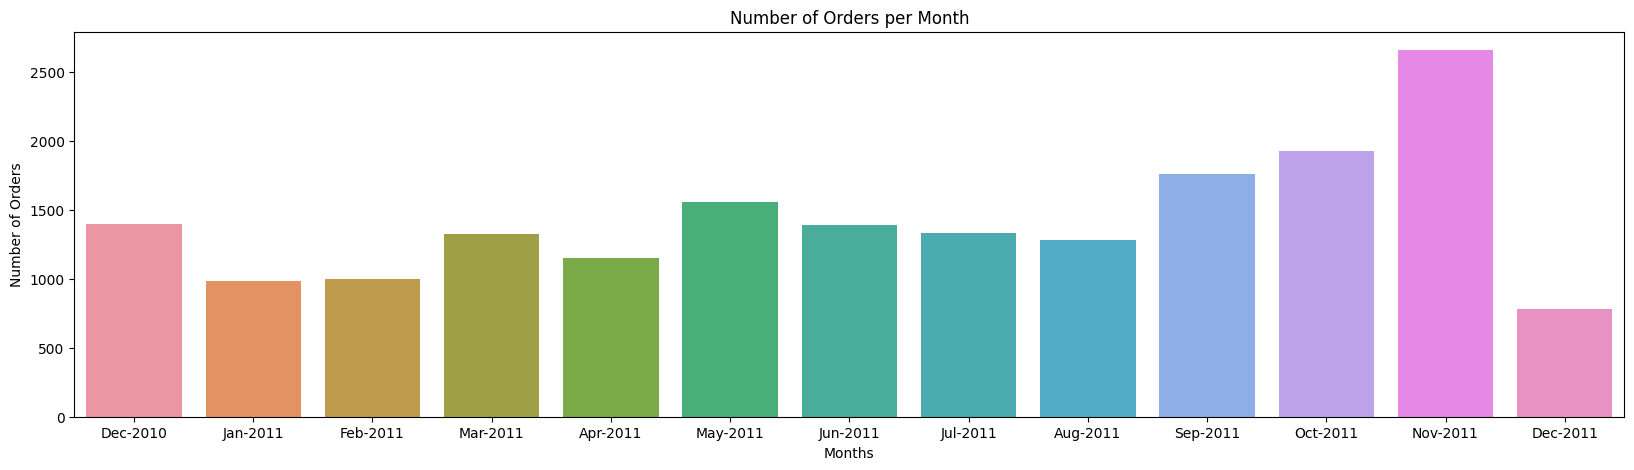

In [34]:
plt.figure(figsize=(20,5))
sns.barplot(x=orders_per_month.month_year, y=orders_per_month.invoice_num)
plt.xlabel('Months')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Month')

#### Conclusion
The average number of orders per month (from Dec 2010 to Dec 2011) are ~1426, with the maximum number of orders in Novemeber 2011. It can be noted that the number of orders increase from September to November.

### Trend of Revenue per month

In [30]:
revenue_per_month = df4.groupby(['year', 'month', 'month_name'], as_index=False)['total_amount'].sum()
revenue_per_month['month_year'] = revenue_per_month['month_name'].str[:3] + '-' + revenue_per_month['year'].astype(str)
revenue_per_month[['total_amount']].describe().round(2)

,total_amount
count,13.00
mean,685492.92
std,223413.63
min,447137.35
25%,569445.04
50%,600091.01
75%,678594.56
max,1161817.38


Text(0.5, 1.0, 'Revenue per Month')

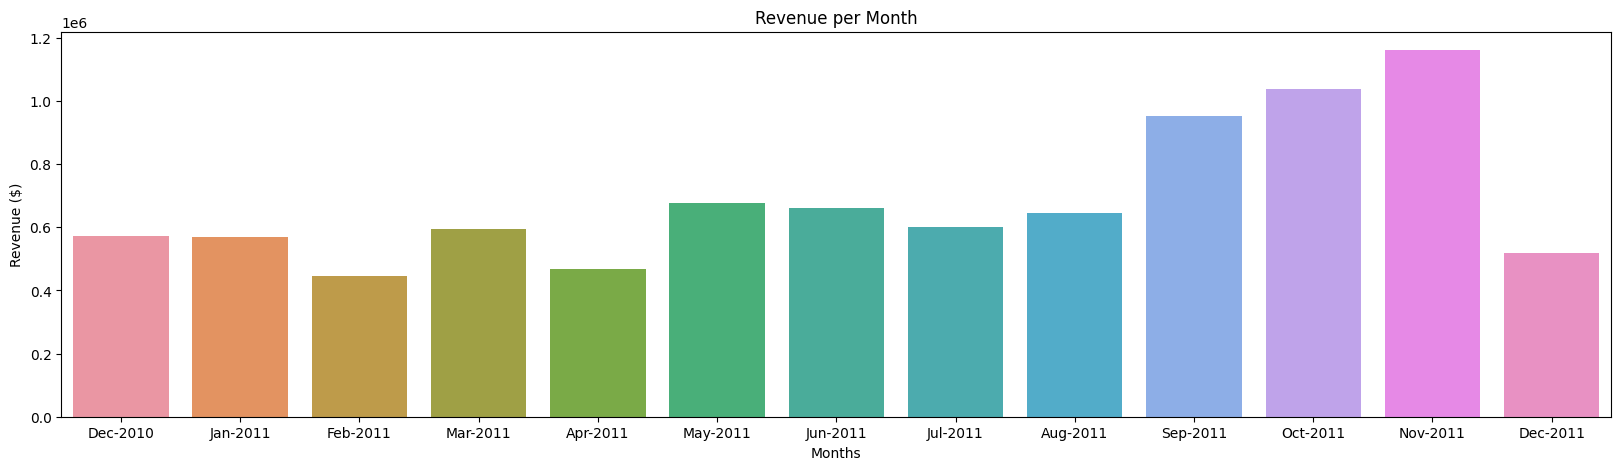

In [35]:
plt.figure(figsize=(20,5))
sns.barplot(x=revenue_per_month.month_year, y=revenue_per_month.total_amount)
plt.xlabel('Months')
plt.ylabel('Revenue ($)')
plt.title('Revenue per Month')

#### Conclusion
The average revenue per month (from Dec 2010 to Dec 2011) is ~685,493, with the maximum revenue in Novemeber 2011. Similar to the increase in number of orders, there is sharp increase in revenue from September to November.

### Trend of free items per month

In [35]:
freebies_per_month = free_items_data.groupby(['year', 'month', 'month_name'], as_index=False).agg({'invoice_num':'nunique', 'quantity':'sum'})
freebies_per_month['month_year'] = freebies_per_month['month_name'].str[:3] + '-' + freebies_per_month['year'].astype(str)
freebies_per_month[['invoice_num', 'quantity']].describe().round(2)

,invoice_num,quantity
count,11.00,11.00
mean,3.09,1262.18
std,3.02,3846.35
min,1.00,2.00
25%,2.00,10.00
50%,2.00,16.00
75%,3.00,66.50
max,12.00,12837.00


Text(0.5, 1.0, 'Free items given per Month')

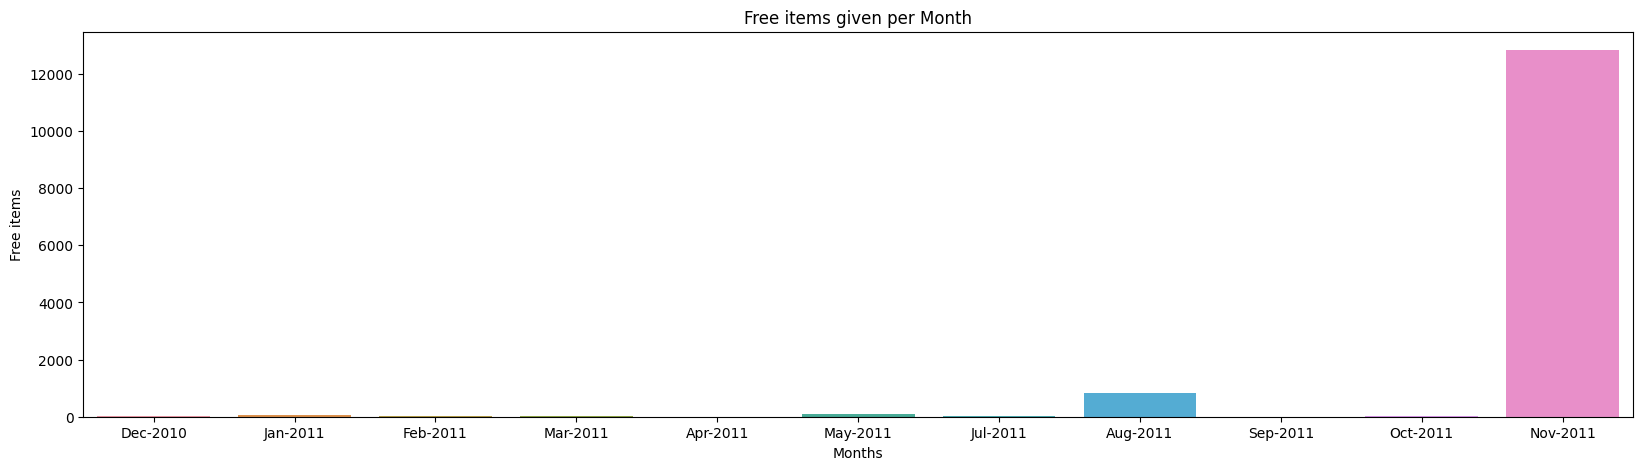

In [36]:
plt.figure(figsize=(20,5))
sns.barplot(x=freebies_per_month.month_year, y=freebies_per_month.quantity)
plt.xlabel('Months')
plt.ylabel('Free items')
plt.title('Free items given per Month')

Text(0.5, 1.0, 'Number of Orders Receiving Free Items per Month')

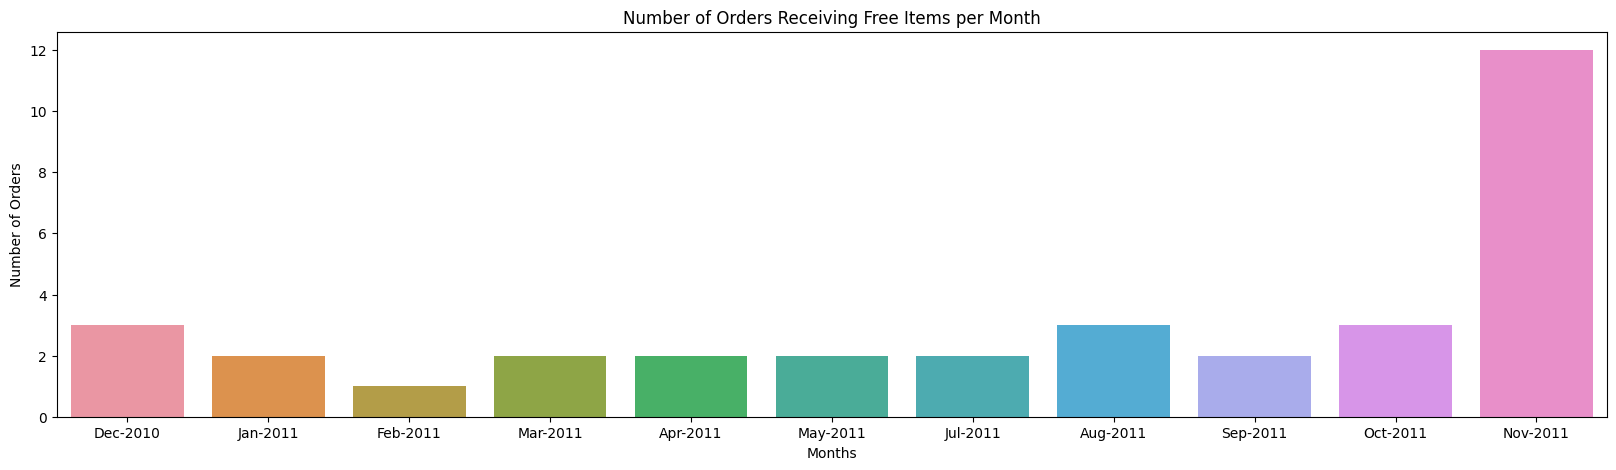

In [43]:
plt.figure(figsize=(20,5))
sns.barplot(x=freebies_per_month.month_year, y=freebies_per_month.invoice_num)
plt.xlabel('Months')
plt.ylabel('Number of Orders')
plt.title('Number of Orders Receiving Free Items per Month')

#### Conclusion
Only a select few orders (1-3) are given free items are month (excluding November where 12 orders included free gifts). The criteria for who gets a free gift is uncertain.

### Trend of returns per month

In [46]:
returns_per_month = returned_items_data.groupby(['year', 'month', 'month_name'], as_index=False).agg({'invoice_num':'nunique', 'quantity':'sum', 'total_amount':'sum'})
returns_per_month['month_year'] = returns_per_month['month_name'].str[:3] + '-' + returns_per_month['year'].astype(str)
returns_per_month['quantity'] = -(returns_per_month['quantity'])
returns_per_month['total_amount'] = -(returns_per_month['total_amount'])
returns_per_month[['invoice_num', 'quantity', 'total_amount']].describe().round(2)

,invoice_num,quantity,total_amount
count,13.00,13.00,13.00
mean,281.08,21139.08,47026.31
std,69.02,27478.15,45033.19
min,143.00,2805.00,10591.20
25%,249.00,6014.00,21398.01
50%,294.00,11973.00,29409.64
75%,314.00,15918.00,53200.53
max,428.00,83577.00,175686.41


In [47]:
returns_per_month

,year,month,month_name,invoice_num,quantity,total_amount,month_year
0,2010,12,December,308,15918,18109.87,Dec-2010
1,2011,1,January,249,79768,94370.66,Jan-2011
2,2011,2,February,204,2805,10591.20,Feb-2011
3,2011,3,March,298,4532,15536.15,Mar-2011
4,2011,4,April,235,13640,43152.51,Apr-2011
5,2011,5,May,294,5833,30343.48,May-2011
6,2011,6,June,314,6777,53200.53,Jun-2011
7,2011,7,July,262,6014,25852.53,Jul-2011
8,2011,8,August,263,12326,28975.90,Aug-2011
9,2011,9,September,322,7403,21398.01,Sep-2011


Text(0.5, 1.0, 'Number of Return Orders per Month')

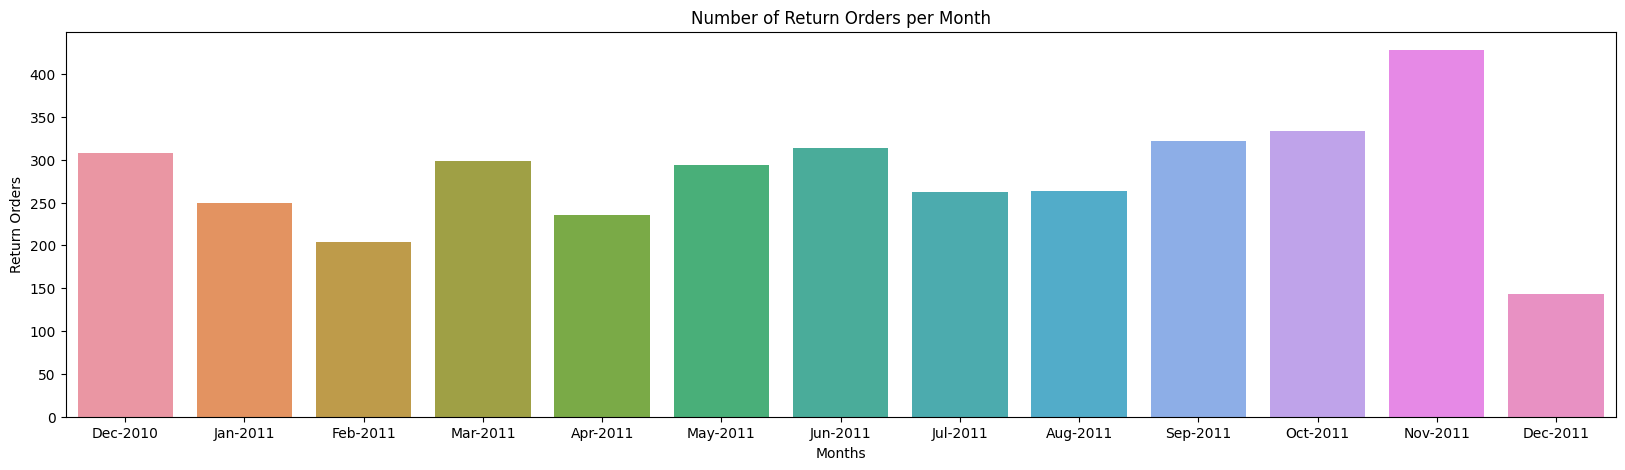

In [48]:
plt.figure(figsize=(20,5))
sns.barplot(x=returns_per_month.month_year, y=returns_per_month.invoice_num)
plt.xlabel('Months')
plt.ylabel('Return Orders')
plt.title('Number of Return Orders per Month')

Text(0.5, 1.0, 'Number of Returned Items per Month')

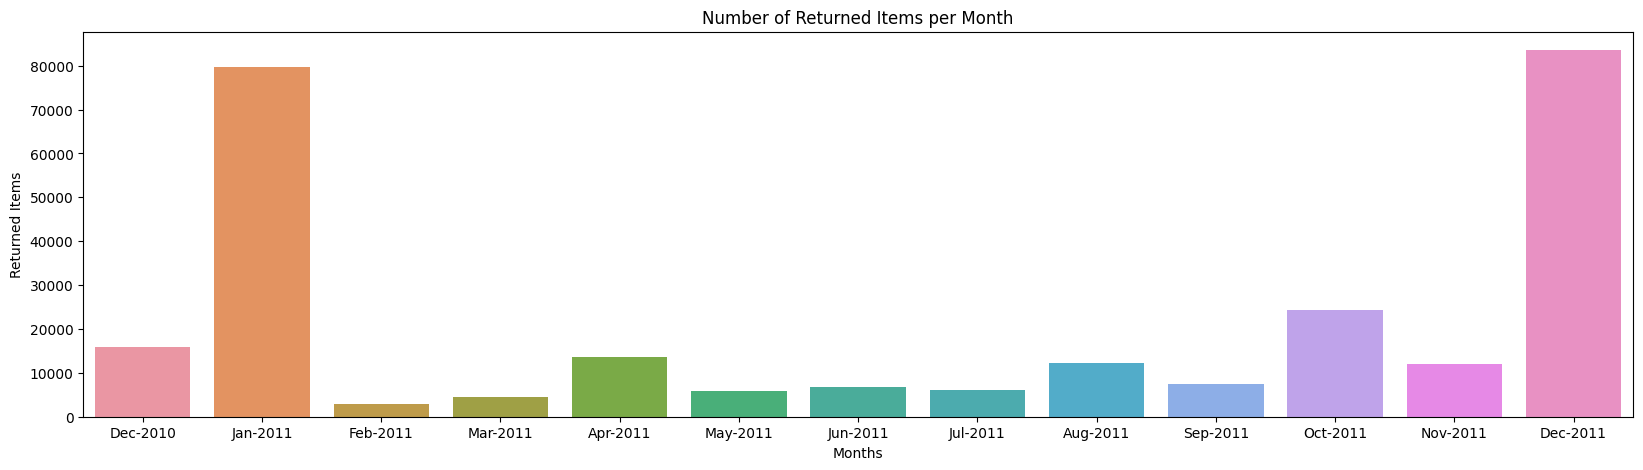

In [49]:
plt.figure(figsize=(20,5))
sns.barplot(x=returns_per_month.month_year, y=returns_per_month.quantity)
plt.xlabel('Months')
plt.ylabel('Returned Items')
plt.title('Number of Returned Items per Month')

Text(0.5, 1.0, 'Lost Revenue ($) per Month')

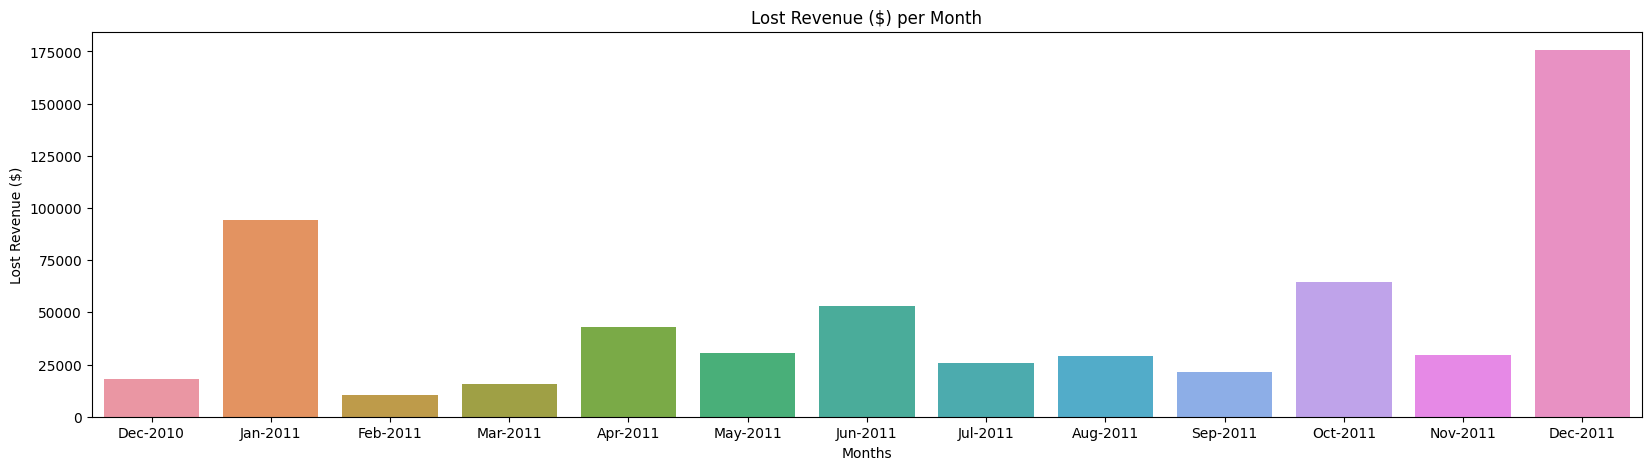

In [50]:
plt.figure(figsize=(20,5))
sns.barplot(x=returns_per_month.month_year, y=returns_per_month.total_amount)
plt.xlabel('Months')
plt.ylabel('Lost Revenue ($)')
plt.title('Lost Revenue ($) per Month')

#### Conclusion
The number of return orders is fairly consistent throughout the months, having an average of ~281 with a slight spike in November. The number of returned items (and hence the revenue lost), however, is significantly high in the months of January and December of the year 2011.

### Trend of Orders per day of the week

In [51]:
orders_per_weekday = df4.groupby(['weekday_num','weekday'], as_index=False)['invoice_num'].nunique()
orders_per_weekday[['invoice_num']].describe().round(2)

,invoice_num
count,6.00
mean,3089.33
std,632.19
min,2169.00
25%,2839.00
50%,3024.00
75%,3387.50
max,4033.00


Text(0.5, 1.0, 'Number of Orders per Day of the Week')

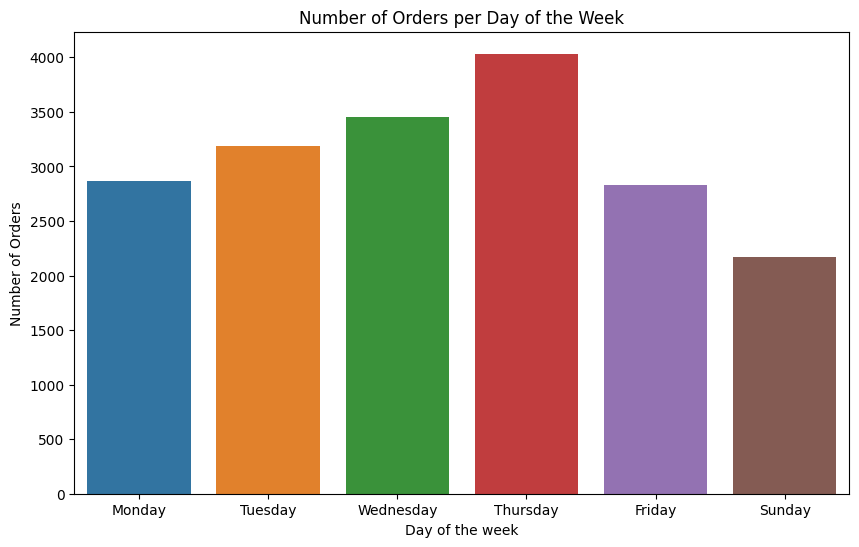

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x=orders_per_weekday.weekday, y=orders_per_weekday.invoice_num)
plt.xlabel('Day of the week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Day of the Week')

####Conclusion
The number of orders increases from Monday to Thursday but decrease afterwards. It is interesting to note that there is no record of any sales on Saturday.

### Trend of Orders per hour of the day

In [56]:
orders_per_hour = df4.groupby(['hour'], as_index=False)['invoice_num'].nunique()
orders_per_hour[['invoice_num']].describe().round(2)

,invoice_num
count,15.0
mean,1235.8
std,1105.8
min,1.0
25%,156.5
50%,1100.0
75%,2250.5
max,3130.0


Text(0.5, 1.0, 'Number of Orders per Hour of the day')

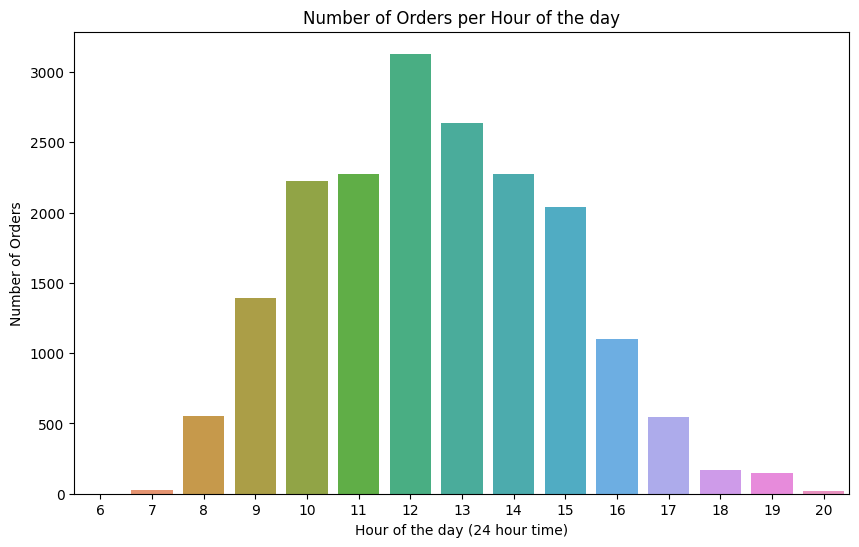

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(x=orders_per_hour.hour, y=orders_per_hour.invoice_num)
plt.xlabel('Hour of the day (24 hour time)')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Hour of the day')

####Conclusion
The amount of sales made increases from 6 am to Noon (12 pm) but then decreases afterwards. The most number of sales happen around Noon. The time period generating the most sales is from 10 am to 3 pm.

## Patterns for Countries

### Trend of Orders per Country

In [59]:
orders_per_country = df4.groupby(['country'], as_index=False)['invoice_num'].nunique().sort_values('invoice_num', ascending=False)
orders_per_country_top_15 = orders_per_country.iloc[:15]
orders_per_country_top_15

,country,invoice_num
35,United Kingdom,16649
14,Germany,457
13,France,389
10,EIRE,260
3,Belgium,98
23,Netherlands,95
30,Spain,90
0,Australia,57
26,Portugal,57
32,Switzerland,51


Text(0.5, 1.0, 'Number of Orders per Country')

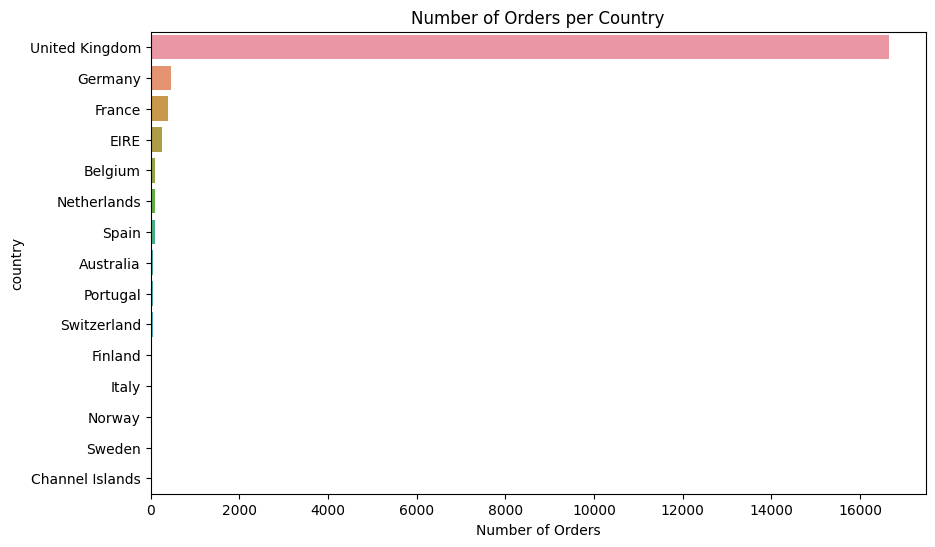

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(y=orders_per_country_top_15.country, x=orders_per_country_top_15.invoice_num, orient='h')
plt.xlabel('Number of Orders')
plt.title('Number of Orders per Country')

In [71]:
# Exclude UK
orders_per_country_exclude_UK = orders_per_country.iloc[1:]

Text(0.5, 1.0, 'Number of Orders per Country (excluding UK)')

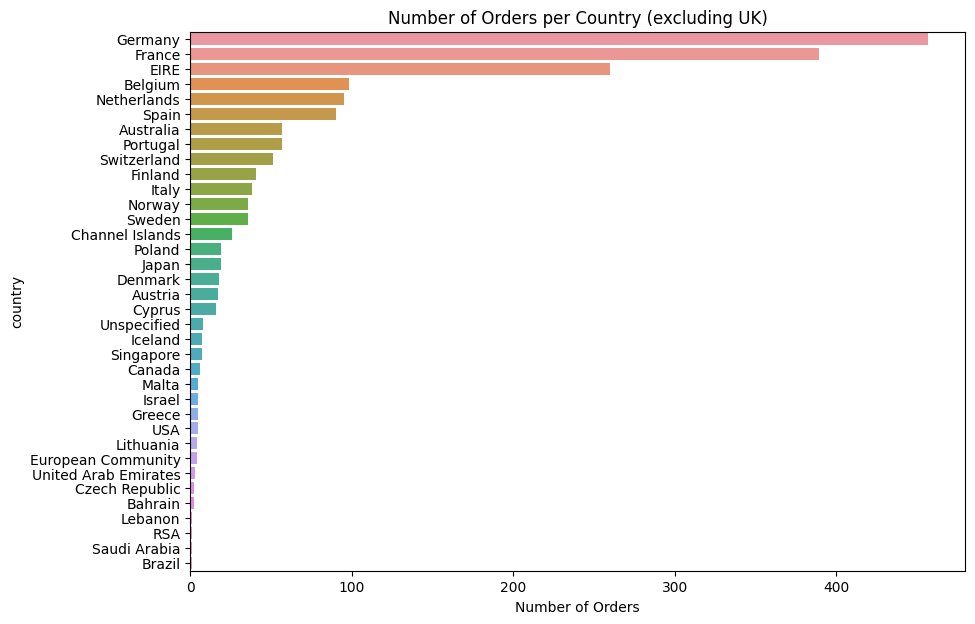

In [63]:
plt.figure(figsize=(10,7))
sns.barplot(y=orders_per_country_exclude_UK.country, x=orders_per_country_exclude_UK.invoice_num, orient='h')
plt.xlabel('Number of Orders')
plt.title('Number of Orders per Country (excluding UK)')

####Conclusion
The highest number of orders are generated in the UK with Germany, France, and Ireland (EIRE) following behind. It can be hypothesized that UK is the base for the company due to the sheer number of orders generated (outlier).

### Trend of customers per country

In [64]:
customers_per_country = df4.groupby(['country'], as_index=False)['customer_id'].nunique().sort_values('customer_id', ascending=False)
customers_per_country_top_15 = customers_per_country.iloc[:15]
customers_per_country_top_15

,country,customer_id
35,United Kingdom,3921
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,12
1,Austria,11


Text(0.5, 1.0, 'Number of Customers per Country')

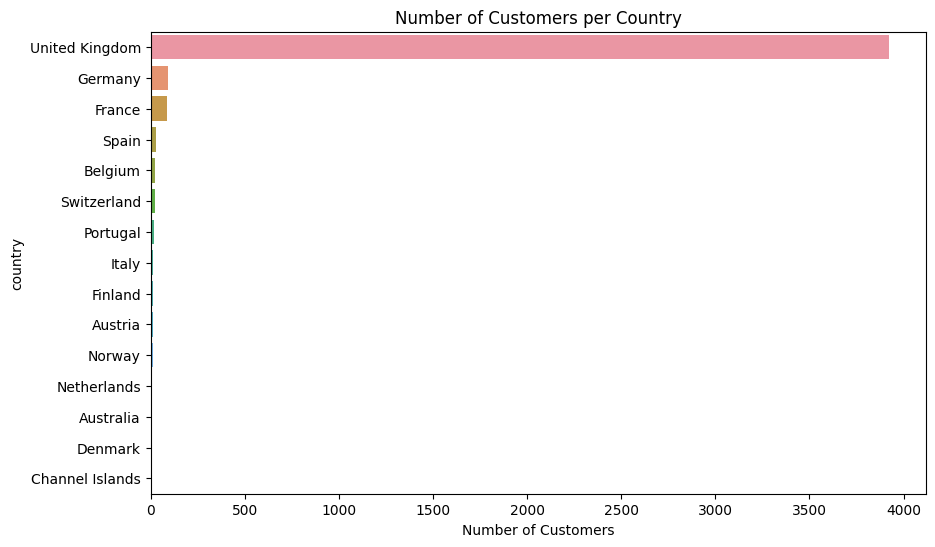

In [65]:
plt.figure(figsize=(10,6))
sns.barplot(y=customers_per_country_top_15.country, x=customers_per_country_top_15.customer_id, orient='h')
plt.xlabel('Number of Customers')
plt.title('Number of Customers per Country')

In [70]:
# Exclude UK
customers_per_country_exclude_UK = customers_per_country.iloc[1:]

Text(0.5, 1.0, 'Number of Customers per Country (excluding UK)')

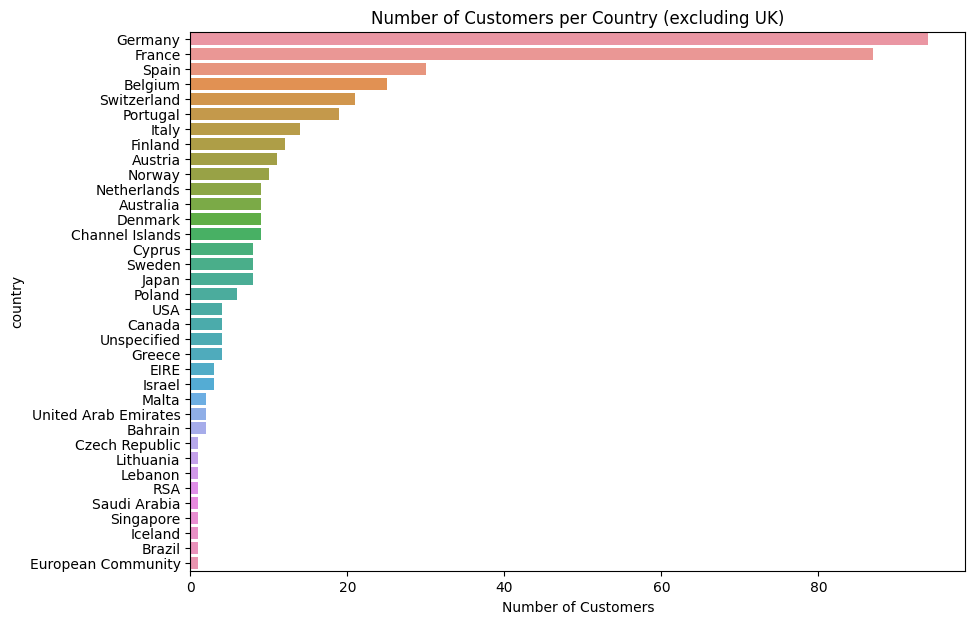

In [67]:
plt.figure(figsize=(10,7))
sns.barplot(y=customers_per_country_exclude_UK.country, x=customers_per_country_exclude_UK.customer_id, orient='h')
plt.xlabel('Number of Customers')
plt.title('Number of Customers per Country (excluding UK)')

####Conclusion
The most number of customers are in the UK with Germany, France, and Spain following behind. The hypothesis for UK being the base of the company is strengthened.

### Trend of revenue generated per country

In [69]:
revenue_per_country = df4.groupby(['country'], as_index=False)['total_amount'].sum().sort_values('total_amount', ascending=False)
revenue_per_country_top_15 = revenue_per_country.iloc[:15]
revenue_per_country_top_15

,country,total_amount
35,United Kingdom,7308391.554
23,Netherlands,285446.340
10,EIRE,265545.900
14,Germany,228867.140
13,France,209024.050
0,Australia,138521.310
30,Spain,61577.110
32,Switzerland,56443.950
3,Belgium,41196.340
31,Sweden,38378.330


Text(0.5, 1.0, 'Revenue Generated per Country (Top 15)')

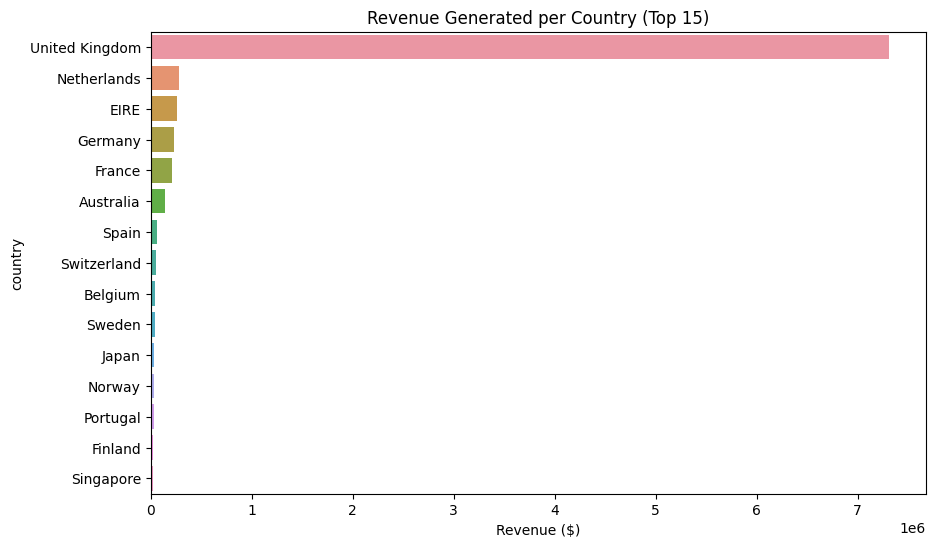

In [72]:
plt.figure(figsize=(10,6))
sns.barplot(y=revenue_per_country_top_15.country, x=revenue_per_country_top_15.total_amount, orient='h')
plt.xlabel('Revenue ($)')
plt.title('Revenue Generated per Country (Top 15)')

In [73]:
# Exclude UK
revenue_per_country_exclude_UK = revenue_per_country.iloc[1:]

Text(0.5, 1.0, 'Total Amount Spent per Country (excluding UK)')

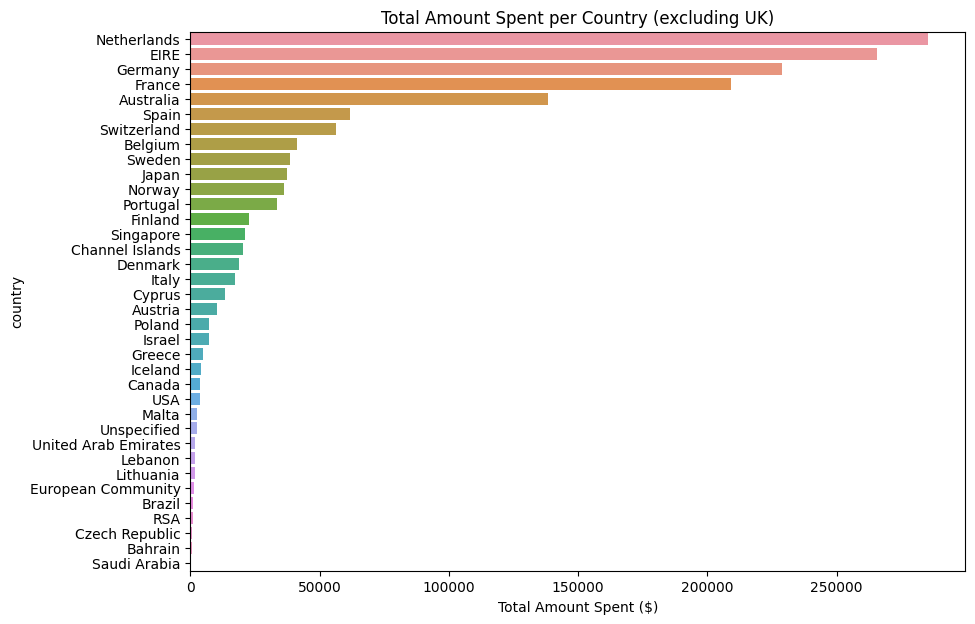

In [74]:
plt.figure(figsize=(10,7))
sns.barplot(y=revenue_per_country_exclude_UK.country, x=revenue_per_country_exclude_UK.total_amount, orient='h')
plt.xlabel('Total Amount Spent ($)')
plt.title('Total Amount Spent per Country (excluding UK)')

####Conclusion
The greatest revenue (in $) is generated by the UK with Netherlands, EIRE, and Germany following behind. The hypothesis for UK being the base of the company is further strengthened.

### Trend of returns per country

In [85]:
return_orders_per_country = returned_items_data.groupby(['country'], as_index=False)['invoice_num'].nunique().sort_values('invoice_num', ascending=False)
lost_revenue_per_country = returned_items_data.groupby(['country'], as_index=False)['total_amount'].sum().sort_values('total_amount')
lost_revenue_per_country['total_amount'] = -(lost_revenue_per_country['total_amount'])

Text(0.5, 1.0, 'Number of Return Orders per Country')

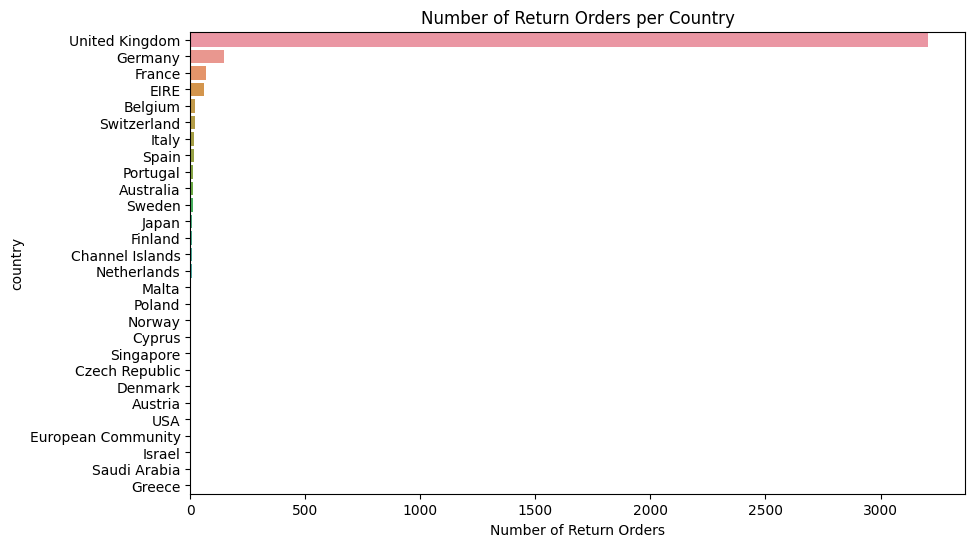

In [86]:
plt.figure(figsize=(10,6))
sns.barplot(y=return_orders_per_country.country, x=return_orders_per_country.invoice_num, orient='h')
plt.xlabel('Number of Return Orders')
plt.title('Number of Return Orders per Country')

Text(0.5, 1.0, 'Revenue Lost per Country')

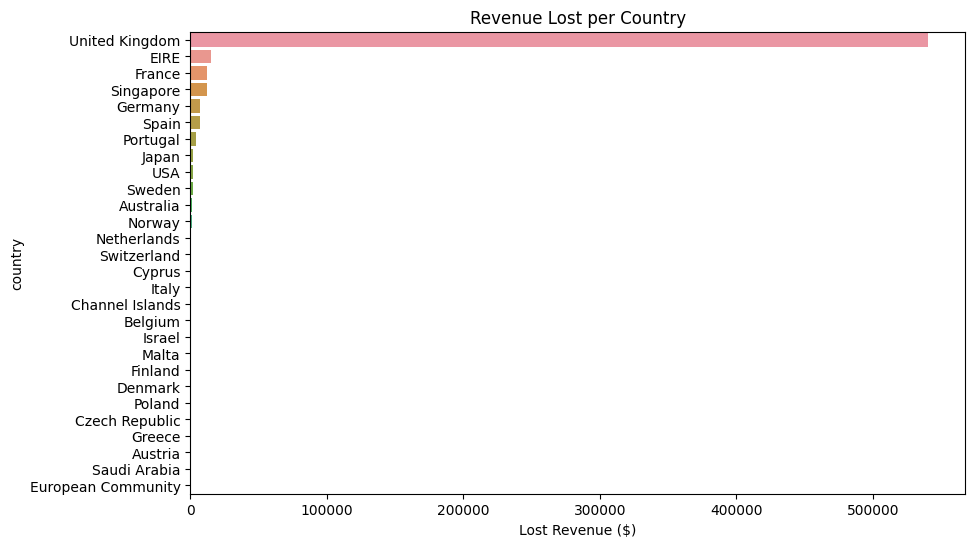

In [87]:
plt.figure(figsize=(10,6))
sns.barplot(y=lost_revenue_per_country.country, x=lost_revenue_per_country.total_amount, orient='h')
plt.xlabel('Lost Revenue ($)')
plt.title('Revenue Lost per Country')

In [88]:
# Exclude UK
return_orders_per_country_exclude_UK = return_orders_per_country.iloc[1:]
lost_revenue_per_country_exclude_UK = lost_revenue_per_country.iloc[1:]

Text(0.5, 1.0, 'Number of Return Orders per Country (excluding UK)')

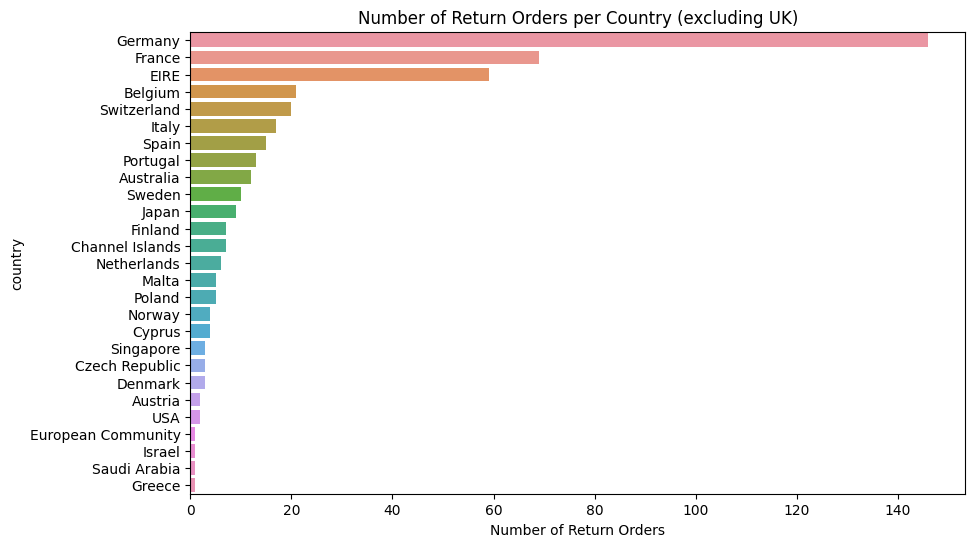

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(y=return_orders_per_country_exclude_UK.country, x=return_orders_per_country_exclude_UK.invoice_num, orient='h')
plt.xlabel('Number of Return Orders')
plt.title('Number of Return Orders per Country (excluding UK)')

Text(0.5, 1.0, 'Revenue Lost per Country (excluding UK)')

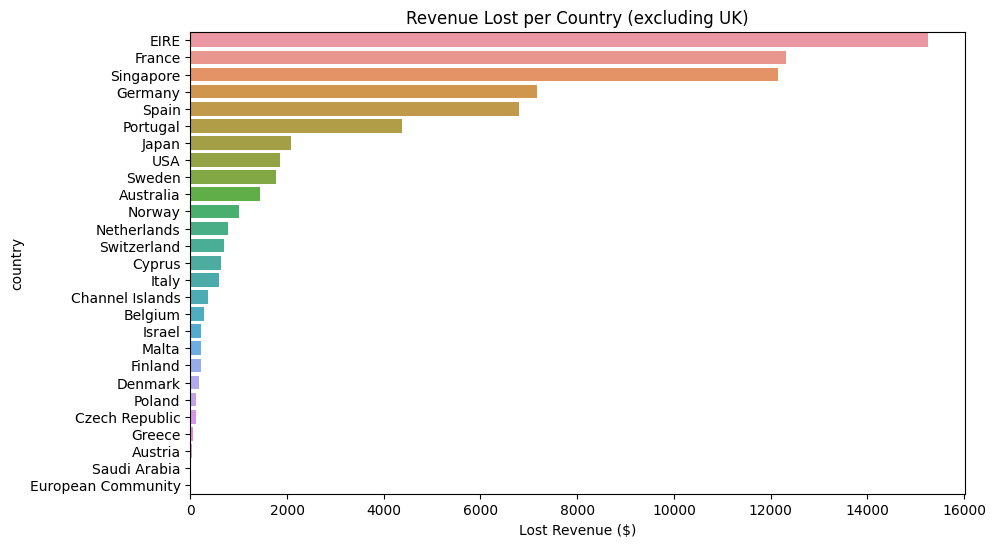

In [91]:
plt.figure(figsize=(10,6))
sns.barplot(y=lost_revenue_per_country_exclude_UK.country, x=lost_revenue_per_country_exclude_UK.total_amount, orient='h')
plt.xlabel('Lost Revenue ($)')
plt.title('Revenue Lost per Country (excluding UK)')

####Conclusion
The greatest revenue loss and most number of return orders are generated in the UK, with Ireland (EIRE) and France following behind.

### Trend of free items given per country

In [103]:
lucky_customers_per_country = free_items_data.groupby(['country'], as_index=False)['invoice_num'].nunique().sort_values('invoice_num', ascending=False)

Text(0.5, 1.0, 'Number of Customers Receiving Free Items per Country')

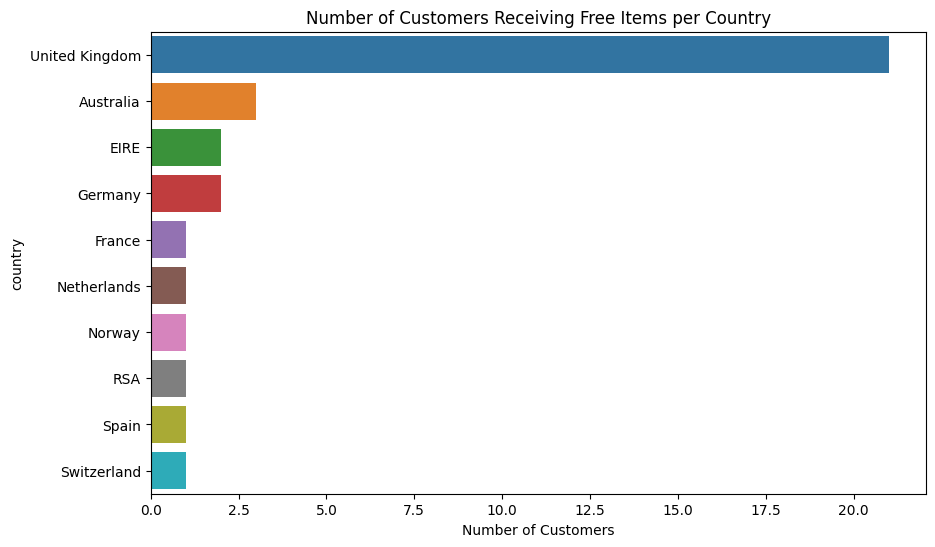

In [104]:
plt.figure(figsize=(10,6))
sns.barplot(y=lucky_customers_per_country.country, x=lucky_customers_per_country.invoice_num, orient='h')
plt.xlabel('Number of Customers')
plt.title('Number of Customers Receiving Free Items per Country')

####Conclusion
Customers in the UK are most likely to receive free items, although it can also be due to the sheer number of customers and orders from the UK.

## Patterns for Customers

### TOP 5 customers (by orders and by money spent)

In [105]:
repeat_customers = df4.groupby(['customer_id', 'country'], as_index=False)['invoice_num'].nunique().sort_values('invoice_num', ascending=False)
repeat_customers.rename(columns = {'invoice_num':'num_orders'}, inplace = True)
repeat_customers.head()

,customer_id,country,num_orders
334,12748,United Kingdom,210
1888,14911,EIRE,201
4019,17841,United Kingdom,124
570,13089,United Kingdom,97
1670,14606,United Kingdom,93


In [106]:
spending_customers = df4.groupby(['customer_id', 'country'], as_index=False)['total_amount'].sum().sort_values('total_amount', ascending=False)
spending_customers.head()

,customer_id,country,total_amount
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


####Conclusion
Customers buying the most amount of goods and spending the most hail from UK, Netherlands and Ireland (EIRE)

### Top 5 customers who made the most returns

In [53]:
df13 = returned_items_data.groupby(['customer_id', 'country'], as_index=False)['invoice_num'].nunique().sort_values('invoice_num', ascending=False)
df13.head()

,customer_id,country,invoice_num
737,14911,EIRE,47
1486,17841,United Kingdom,45
653,14606,United Kingdom,35
636,14527,United Kingdom,31
849,15311,United Kingdom,27


In [54]:
df14 = returned_items_data.groupby(['customer_id', 'country'], as_index=False)['total_amount'].sum().sort_values('total_amount')
df14.head()

,customer_id,country,total_amount
1137,16446,United Kingdom,-168469.60
0,12346,United Kingdom,-77183.60
780,15098,United Kingdom,-39267.00
1040,16029,United Kingdom,-30032.23
966,15749,United Kingdom,-22998.40


####Conclusion
Interesting things to note:
*   Three customers (14911, 17841 and 14606) are among the people who have the most amount of orders as well as the people with the most number of returned orders.
*   One customer (16446) spent 168472.50 but then returned items and got most of the cash back.



## Patterns for Unit Price

### Trends for Unit Price

In [55]:
df4.unit_price.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

<Axes: >

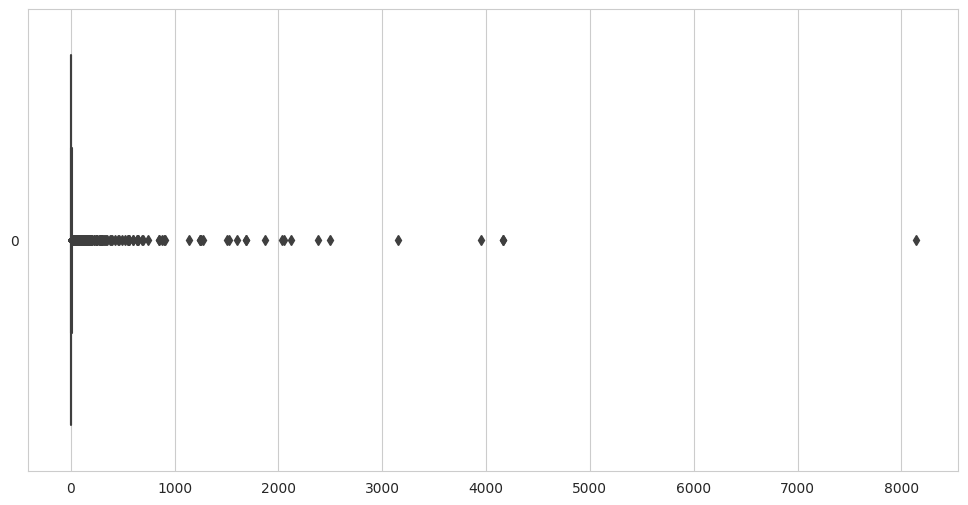

In [56]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.boxplot(df4.unit_price, orient='h')

#### Conclusion
Most number of items sold are cheap and cost less than $4.

# Predictive analysis

In [39]:
orders = df4.groupby('invoice_num').agg({'day':'first', 'month':'first', 'year':'first', 'quantity':'sum', 'total_amount':'sum', 'customer_id':'first', 'country':'first'})
orders.head()

,day,month,year,quantity,total_amount,customer_id,country
invoice_num,,,,,,,
536365,1,12,2010,40,139.12,17850,United Kingdom
536366,1,12,2010,12,22.20,17850,United Kingdom
536367,1,12,2010,83,278.73,13047,United Kingdom
536368,1,12,2010,15,70.05,13047,United Kingdom
536369,1,12,2010,3,17.85,13047,United Kingdom


## Correlation Map

Text(0.5, 1.0, 'Correlation Diagram')

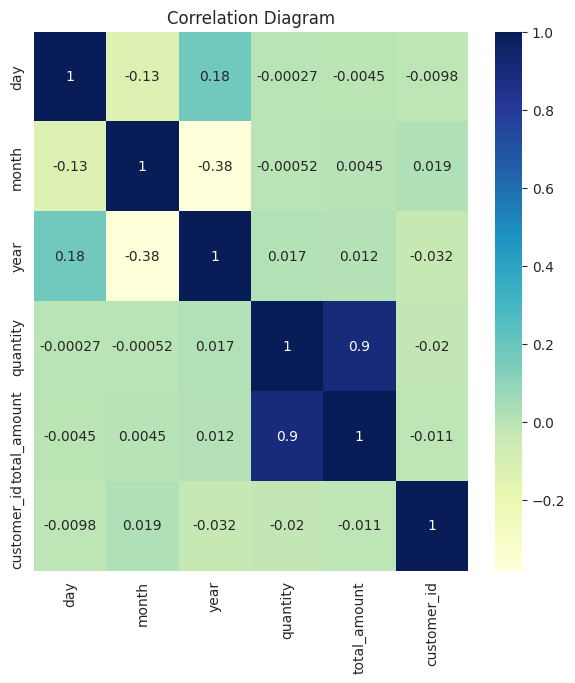

In [58]:
plt.figure(figsize = (7,7))
sns.heatmap(orders.corr(),cmap='YlGnBu',annot=True)
plt.title("Correlation Diagram")

There are no significant correlations and more information would be needed about the customers to determine correlational properties

## Hypothesis Testing

### Is the amount of items bought in a single order by customers in the UK greater than those not from the UK?

H0: The amount of items bought in a single order by customers in the UK and non-UK is the same (similar or equal).<br>
Ha: The amount of items bought in a single order by customers in the UK is greater than those not from UK.

In [40]:
amount_of_items_UK = orders[orders['country'] == 'United Kingdom']['quantity']
amount_of_items_non_UK = orders[orders['country'] != 'United Kingdom']['quantity']

In [42]:
stats.ttest_ind(amount_of_items_UK, amount_of_items_non_UK, alternative = 'greater')

TtestResult(statistic=-9.590229755498623, pvalue=1.0, df=18534.0)

#### Conclusion
As the p-value (1.0) is greater than 0.05, we accept the null hypothesis. Hence, we can conclude that the amount of items bought in a single order by customers in the UK and non-UK is the same (similar or equal).

## Chi-Square Test

H0 (Null Hypothesis) = There is no association between Country and Month (independent variables).</br>
H1 (Alternate Hypothesis) = There is an association between Country and Month (dependent variable).

In [65]:
chisqt = pd.crosstab(orders['country'],orders['month'], margins=True)
chisqt

month,1,2,3,4,5,6,7,8,9,10,11,12,All
country,,,,,,,,,,,,,
Australia,9,5,3,2,4,4,7,2,8,4,6,3,57
Austria,0,2,2,2,2,0,2,2,0,1,2,2,17
Bahrain,0,0,0,0,2,0,0,0,0,0,0,0,2
Belgium,3,8,9,6,9,11,5,9,7,11,11,9,98
Brazil,0,0,0,1,0,0,0,0,0,0,0,0,1
Canada,0,0,1,0,1,1,2,1,0,0,0,0,6
Channel Islands,1,1,3,1,2,1,0,5,2,5,3,2,26
Cyprus,1,6,1,0,0,1,0,0,1,4,1,1,16
Czech Republic,0,1,0,0,0,0,0,0,0,1,0,0,2


In [66]:
value = np.array([chisqt.iloc[0][0:].values,
                  chisqt.iloc[1][0:].values])

In [67]:
stats.chi2_contingency(value)

Chi2ContingencyResult(statistic=11.738273789047783, pvalue=0.4669216240819021, dof=12, expected_freq=array([[ 6.93243243,  5.39189189,  3.85135135,  3.08108108,  4.62162162,
         3.08108108,  6.93243243,  3.08108108,  6.16216216,  3.85135135,
         6.16216216,  3.85135135, 57.        ],
       [ 2.06756757,  1.60810811,  1.14864865,  0.91891892,  1.37837838,
         0.91891892,  2.06756757,  0.91891892,  1.83783784,  1.14864865,
         1.83783784,  1.14864865, 17.        ]]))

In [69]:
chi2, p, dof, ex = stats.chi2_contingency(value)
print("chi-square value: ", chi2, '\n',"p-value: ", p, '\n', "dof: ", dof, '\n', "expected: ", ex)

chi-square value:  11.738273789047783 
 p-value:  0.4669216240819021 
 dof:  12 
 expected:  [[ 6.93243243  5.39189189  3.85135135  3.08108108  4.62162162  3.08108108
   6.93243243  3.08108108  6.16216216  3.85135135  6.16216216  3.85135135
  57.        ]
 [ 2.06756757  1.60810811  1.14864865  0.91891892  1.37837838  0.91891892
   2.06756757  0.91891892  1.83783784  1.14864865  1.83783784  1.14864865
  17.        ]]


From above, 0.4669 is the p-value, 12 is the degree of freedom. As the p-value is greater than 0.05, we accept the NULL hypothesis and assume that the variables ‘Country’ and ‘Month’ are independent of each other and have no significant differences.